<a href="https://colab.research.google.com/github/alexD-hub/ML/blob/main/%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D1%80%D1%83%D0%BA%D0%BE%D0%BF%D0%B8%D1%81%D0%BD%D1%8B%D1%85%20%D1%86%D0%B8%D1%84%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [16]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data() #тренировочный и тестовый набор 

In [17]:
print(type(x_test)) #Что из себя представляется массив

<class 'numpy.ndarray'>


In [18]:
print(x_test.shape) #10к элементов и размером 28*28 пикселей
print(y_test.shape)

(10000, 28, 28)
(10000,)


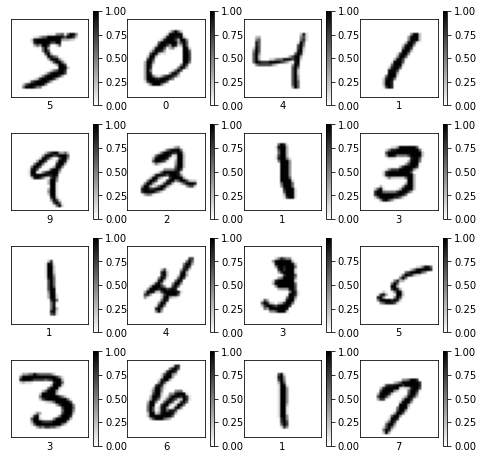

In [22]:
plt.figure(figsize=(8, 8))
for i in range(16):
  plt.subplot(4, 4, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.colorbar()
  plt.xlabel(y_train[i])
plt.show()

In [21]:
x_train = x_train / 255 #яркости пикселей должны изменяться от 0 до 1 (а не от 0 до 255)
x_test = x_test / 255

In [55]:
model = tf.keras.models.Sequential([  #создание модели нейросети (архитектуры)
    tf.keras.layers.Conv2D(  #Конвуляционный слой:к изначальному массиву (изображению) применяется конвуляционный фильтр (оконо) для скалярного произведения матриц, делается для выявления отличительных признаков классов
        input_shape=(28, 28, 1), #29*28 р-р изображения и 1 - ч/б изображение(3 - RGB) 
        filters=32, 
        kernel_size=(5, 5), #р-р ядра
        padding='same', #чтобы конвуляционный фильтр выходил за изображение
        activation='relu'
    ),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)), #MaxPool - усиление отличительных признаков, pool_size - размер ядра пуллинга
    tf.keras.layers.Conv2D( #Добавление еще одного слоя конволюции 
        filters=64, 
        kernel_size=(5, 5), #р-р ядра
        padding='same', #чтобы конвуляционный фильтр выходил за изображение
        activation='relu'
    ),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)), #Еще один слой MaxPool`инга
    tf.keras.layers.Flatten (), #слой Flatten трансформации в новую размерность input_shape - размер массива,724 пикселя в ряд/после макспуллинга р-р изобр. изменился и поэтому его не указываем
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),  #Добавили затем один скрытый полносвязный слой:512 нейронов на выходе, ф-ия активации relu
    tf.keras.layers.Dropout(0.4), #Борьба с переобучением, оборвем 40% нейронных связей
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)   #полносвязный слой с 2мя параметрами:кол-во нейронов на выходе (кол-во нейронов = класс цифры);ф-ия активации softmax
])

In [56]:
model.compile( #компиляция модели
    optimizer='adam', #оптимизатор 'адам'
    loss='sparse_categorical_crossentropy',  #функция потерь,считает ошибку нейросети,когда мы обучаем с учителем
    metrics=['accuracy'] #за метрику считаем точность
)

In [57]:
model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=5) #тренировка, 3 пар-ма:x_train-изображения,y_train-ответы к изображениям,эпохи обучения/ .reshape(-1, 28, 28, 1) - добавление размерности для конвуляционного слоя

Epoch 1/5
1875/1875 [==============================] - 208s 111ms/step - loss: 0.2257 - accuracy: 0.9267
Epoch 2/5
1875/1875 [==============================] - 206s 110ms/step - loss: 0.0397 - accuracy: 0.9880
Epoch 3/5
1875/1875 [==============================] - 204s 109ms/step - loss: 0.0274 - accuracy: 0.9919
Epoch 4/5
1875/1875 [==============================] - 205s 109ms/step - loss: 0.0230 - accuracy: 0.9927
Epoch 5/5
1875/1875 [==============================] - 204s 109ms/step - loss: 0.0180 - accuracy: 0.9943


In [58]:
print(model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)) #проверка нейросети на тестовом наборе

313/313 [==============================] - 8s 24ms/step - loss: 0.0265 - accuracy: 0.9926
[0.02654344215989113, 0.9926000237464905]


In [47]:
def model_answer(model, filename, display=True):
  image = imageio.imread(filename) #загрузка изображений
  image = np.mean(image, 2, dtype=float) #преобразование изображений
  image = image / 255
  if display:  #если display True,то отрисуем изображения
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(filename)
    plt.show()

  image = np.expand_dims(image, 0)
  image = np.expand_dims(image, -1)
  return np.argmax(model.predict(image))

Имя файла:  0.png 	Ответ сети:  0
Имя файла:  1.png 	Ответ сети:  1
Имя файла:  2.png 	Ответ сети:  2
Имя файла:  3.png 	Ответ сети:  3
Имя файла:  4.png 	Ответ сети:  4
Имя файла:  5.png 	Ответ сети:  5
Имя файла:  6.png 	Ответ сети:  5
Имя файла:  7.png 	Ответ сети:  7
Имя файла:  8.png 	Ответ сети:  8
Имя файла:  9.png 	Ответ сети:  5


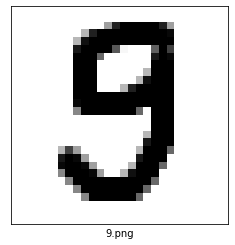

5


In [59]:
for i in range(10):
  filename = f'{i}.png'
  print('Имя файла: ', filename, '\tОтвет сети: ', model_answer(model, filename, False))
print(model_answer(model, '9.png'))